## Getting Started

In this exercise I will use the features I previously engineered using R and Kaggle Mercari Price challenge data set. 

We will start with loading the libraries and functions we will need during the modeling.

In [1]:
import pandas as pd
import numpy as np
import os
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
np.random.seed(12345)

Using TensorFlow backend.
/Users/OZANAYGUN/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Deep+Learning+using+Mercari+Data+set.ipynb',
 'mini_subtrain.csv',
 'subtrain.csv',
 'validation.csv']

In [13]:
#First load the mini subtraining set we prepared previously
mini_subtrain = pd.read_csv("mini_subtrain.csv", index_col = 0)
mini_subtrain.shape
mini_subtrain.head()


,item_condition_id,price,shipping,no.brand_name,log.excl.description,excl.name,dollar.description,fancy.categories,cheap.categories,fancy.brands,...,now,cheap,buy,excellent,great,michael.brand,jordan.name,iphon.name,bundl.name,cap.letter.brand
1,1,8.0,0,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,39.0,1,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,30.0,1,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,470.0,1,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
5,2,22.0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [15]:
mini_subtrain.describe()

,item_condition_id,price,shipping,no.brand_name,log.excl.description,excl.name,dollar.description,fancy.categories,cheap.categories,fancy.brands,...,now,cheap,buy,excellent,great,michael.brand,jordan.name,iphon.name,bundl.name,cap.letter.brand
count,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,...,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000
mean,1.902876,26.581045,0.449630,0.428776,0.461340,0.078266,0.018319,0.003480,0.005126,0.009820,...,0.032752,0.005315,0.031835,0.031134,0.102412,0.008229,0.008013,0.020774,0.051395,1.589732
std,0.901044,36.188265,0.497463,0.494908,0.985842,0.559334,0.231276,0.058892,0.071413,0.098611,...,0.198214,0.076683,0.211528,0.175689,0.330199,0.090339,0.089156,0.142628,0.220805,1.198543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,29.000000,1.000000,1.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,5.000000,1106.000000,1.000000,1.000000,11.332853,21.000000,14.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,6.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,17.000000


In [16]:
mini_subtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37066 entries, 1 to 37066
Data columns (total 27 columns):
item_condition_id       37066 non-null int64
price                   37066 non-null float64
shipping                37066 non-null int64
no.brand_name           37066 non-null int64
log.excl.description    37066 non-null float64
excl.name               37066 non-null int64
dollar.description      37066 non-null int64
fancy.categories        37066 non-null int64
cheap.categories        37066 non-null int64
fancy.brands            37066 non-null int64
cheap.brands            37066 non-null int64
sale                    37066 non-null int64
free                    37066 non-null int64
save                    37066 non-null int64
deal                    37066 non-null int64
good                    37066 non-null int64
steal                   37066 non-null int64
now                     37066 non-null int64
cheap                   37066 non-null int64
buy                     37066 no

After sucessfully reading the verifying the training data set we have previously constructed using R, we can start building a small neural network and training it by using our data.

First we start with seperating predictors and response arrays:

In [24]:
predictors = np.array(mini_subtrain.drop(["price"], axis=1))
# We will log transform the target variable as we have performed in R
target = np.array(np.log(mini_subtrain.price + 1))

(37066,)

Next we can start building our network:

In [31]:
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (predictors.shape[1],)
model = Sequential()
model.add(Dense(10,activation= "relu", input_shape = pre_shape))
model.add(Dense(10,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_1 = model.fit(predictors,target, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)

Train on 25946 samples, validate on 11120 samples
Epoch 1/30
25946/25946 [==============================] - 3s 98us/step - loss: 1.3796 - val_loss: 0.5341
Epoch 2/30
25946/25946 [==============================] - 1s 56us/step - loss: 0.4969 - val_loss: 0.4515
Epoch 3/30
25946/25946 [==============================] - 1s 56us/step - loss: 0.4742 - val_loss: 0.4472
Epoch 4/30
25946/25946 [==============================] - 1s 55us/step - loss: 0.4719 - val_loss: 0.4500
Epoch 5/30
25946/25946 [==============================] - 2s 66us/step - loss: 0.4720 - val_loss: 0.4457
Epoch 6/30
25946/25946 [==============================] - 2s 65us/step - loss: 0.4704 - val_loss: 0.4510
Epoch 7/30
25946/25946 [==============================] - 2s 64us/step - loss: 0.4698 - val_loss: 0.4503


Note that our loss function is "mean squared error". We will take the square root of this to follow "root mean squared error" (RMSE). We also keep in mind that the target is log transformed.

In [34]:
RMSE_model_1 = np.sqrt(min(model_1.history["val_loss"]))
RMSE_model_1

0.66764026261785125

Note that this RMSE is close to what we have obtained other machine learning algorithms previously. Therefore, we will continue our experiment by increasing model complexity:

In [41]:
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (predictors.shape[1],)
model = Sequential()
model.add(Dense(1000,activation= "relu", input_shape = pre_shape))
model.add(Dense(1000,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_2 = model.fit(predictors,target, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_2 = np.sqrt(min(model_2.history["val_loss"]))
RMSE_model_2

Train on 25946 samples, validate on 11120 samples
Epoch 1/30
25946/25946 [==============================] - 25s 953us/step - loss: 0.6853 - val_loss: 0.4837
Epoch 2/30
25946/25946 [==============================] - 25s 949us/step - loss: 0.4860 - val_loss: 0.4547
Epoch 3/30
25946/25946 [==============================] - 25s 968us/step - loss: 0.4801 - val_loss: 0.4599
Epoch 4/30
25946/25946 [==============================] - 29s 1ms/step - loss: 0.4754 - val_loss: 0.4593


0.67429454720879667

It looks like our first model is already at its capacity. 

In [43]:
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (predictors.shape[1],)
model = Sequential()
model.add(Dense(10,activation= "relu", input_shape = pre_shape))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_3 = model.fit(predictors,target, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_3 = np.sqrt(min(model_3.history["val_loss"]))
RMSE_model_3

Train on 25946 samples, validate on 11120 samples
Epoch 1/30
25946/25946 [==============================] - 3s 111us/step - loss: 1.0952 - val_loss: 0.4894
Epoch 2/30
25946/25946 [==============================] - 2s 72us/step - loss: 0.4874 - val_loss: 0.4550
Epoch 3/30
25946/25946 [==============================] - 2s 72us/step - loss: 0.4755 - val_loss: 0.4524
Epoch 4/30
25946/25946 [==============================] - 2s 72us/step - loss: 0.4727 - val_loss: 0.4561
Epoch 5/30
25946/25946 [==============================] - 2s 66us/step - loss: 0.4711 - val_loss: 0.4517
Epoch 6/30
25946/25946 [==============================] - 2s 71us/step - loss: 0.4686 - val_loss: 0.4507
Epoch 7/30
25946/25946 [==============================] - 2s 68us/step - loss: 0.4679 - val_loss: 0.4551
Epoch 8/30
25946/25946 [==============================] - 2s 84us/step - loss: 0.4683 - val_loss: 0.4571


0.67136944170640311

Looks like we reached to model capacity even with a relatively simple network. Next, we will try if we can reduce the bias by training a larger data set, which we have available.

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Deep+Learning+using+Mercari+Data+set.ipynb',
 'mini_subtrain.csv',
 'subtrain.csv',
 'validation.csv']

In [2]:
subtrain = pd.read_csv("subtrain.csv",index_col=0)

In [3]:
subtrain.shape

(741269, 27)

In [4]:
#We need to check for missing values in the data set
subtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741269 entries, 1 to 741269
Data columns (total 27 columns):
item_condition_id       741269 non-null int64
price                   741269 non-null float64
shipping                741269 non-null int64
no.brand_name           741269 non-null int64
log.excl.description    741268 non-null float64
excl.name               741269 non-null int64
dollar.description      741268 non-null float64
fancy.categories        741269 non-null int64
cheap.categories        741269 non-null int64
fancy.brands            741269 non-null int64
cheap.brands            741269 non-null int64
sale                    741268 non-null float64
free                    741268 non-null float64
save                    741268 non-null float64
deal                    741268 non-null float64
good                    741268 non-null float64
steal                   741268 non-null float64
now                     741268 non-null float64
cheap                   741268 non-null f

In [5]:
subtrain = subtrain.dropna()
subtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741268 entries, 1 to 741269
Data columns (total 27 columns):
item_condition_id       741268 non-null int64
price                   741268 non-null float64
shipping                741268 non-null int64
no.brand_name           741268 non-null int64
log.excl.description    741268 non-null float64
excl.name               741268 non-null int64
dollar.description      741268 non-null float64
fancy.categories        741268 non-null int64
cheap.categories        741268 non-null int64
fancy.brands            741268 non-null int64
cheap.brands            741268 non-null int64
sale                    741268 non-null float64
free                    741268 non-null float64
save                    741268 non-null float64
deal                    741268 non-null float64
good                    741268 non-null float64
steal                   741268 non-null float64
now                     741268 non-null float64
cheap                   741268 non-null f

In [6]:
y = np.log(subtrain.price + 1)
X = subtrain.drop(["price"],axis = 1).as_matrix()

In [7]:
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (X.shape[1],)
model = Sequential()
model.add(Dense(10,activation= "relu", input_shape = pre_shape))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_4 = model.fit(X,y, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_4 = np.sqrt(min(model_4.history["val_loss"]))
RMSE_model_4

Train on 518887 samples, validate on 222381 samples
Epoch 1/30
518887/518887 [==============================] - 38s 73us/step - loss: 0.5185 - val_loss: 0.4680
Epoch 2/30
518887/518887 [==============================] - 37s 71us/step - loss: 0.4695 - val_loss: 0.4894
Epoch 3/30
518887/518887 [==============================] - 38s 73us/step - loss: 0.4674 - val_loss: 0.4629
Epoch 4/30
518887/518887 [==============================] - 38s 72us/step - loss: 0.4664 - val_loss: 0.4629
Epoch 5/30
518887/518887 [==============================] - 37s 72us/step - loss: 0.4658 - val_loss: 0.4662
Epoch 6/30
518887/518887 [==============================] - 37s 71us/step - loss: 0.4654 - val_loss: 0.4617
Epoch 7/30
518887/518887 [==============================] - 37s 71us/step - loss: 0.4650 - val_loss: 0.4623
Epoch 8/30
518887/518887 [==============================] - 37s 70us/step - loss: 0.4649 - val_loss: 0.4617


0.6794526310377843

In [8]:
#Slightly changing the model complexity
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (X.shape[1],)
model = Sequential()
model.add(Dense(25,activation= "relu", input_shape = pre_shape))
model.add(Dense(25,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_5 = model.fit(X,y, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_5 = np.sqrt(min(model_5.history["val_loss"]))
RMSE_model_5

Train on 518887 samples, validate on 222381 samples
Epoch 1/30
518887/518887 [==============================] - 36s 69us/step - loss: 0.5029 - val_loss: 0.4714
Epoch 2/30
518887/518887 [==============================] - 36s 69us/step - loss: 0.4684 - val_loss: 0.4653
Epoch 3/30
518887/518887 [==============================] - 36s 69us/step - loss: 0.4669 - val_loss: 0.4626
Epoch 4/30
518887/518887 [==============================] - 36s 69us/step - loss: 0.4658 - val_loss: 0.4621
Epoch 5/30
518887/518887 [==============================] - 36s 69us/step - loss: 0.4655 - val_loss: 0.4626
Epoch 6/30
518887/518887 [==============================] - 33s 64us/step - loss: 0.4646 - val_loss: 0.4618
Epoch 7/30
518887/518887 [==============================] - 34s 65us/step - loss: 0.4644 - val_loss: 0.4605
Epoch 8/30
518887/518887 [==============================] - 34s 65us/step - loss: 0.4641 - val_loss: 0.4640
Epoch 9/30
518887/518887 [==============================] - 34s 65us/step - loss: 0.

0.67862169258002358

In [9]:
#Slightly changing the model complexity
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (X.shape[1],)
model = Sequential()
model.add(Dense(50,activation= "relu", input_shape = pre_shape))
model.add(Dense(50,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_6 = model.fit(X,y, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_6 = np.sqrt(min(model_6.history["val_loss"]))
RMSE_model_6

Train on 518887 samples, validate on 222381 samples
Epoch 1/30
518887/518887 [==============================] - 37s 72us/step - loss: 0.4934 - val_loss: 0.4676
Epoch 2/30
518887/518887 [==============================] - 38s 72us/step - loss: 0.4687 - val_loss: 0.4653
Epoch 3/30
518887/518887 [==============================] - 38s 72us/step - loss: 0.4662 - val_loss: 0.4616
Epoch 4/30
518887/518887 [==============================] - 37s 70us/step - loss: 0.4653 - val_loss: 0.4616
Epoch 5/30
518887/518887 [==============================] - 37s 72us/step - loss: 0.4644 - val_loss: 0.4615
Epoch 6/30
518887/518887 [==============================] - 37s 71us/step - loss: 0.4638 - val_loss: 0.4613
Epoch 7/30
518887/518887 [==============================] - 37s 72us/step - loss: 0.4634 - val_loss: 0.4608
Epoch 8/30
518887/518887 [==============================] - 37s 72us/step - loss: 0.4631 - val_loss: 0.4618
Epoch 9/30
518887/518887 [==============================] - 37s 71us/step - loss: 0.

0.67883387278347673

In [12]:
#Changing optimizer to SGD
sgd_optimizer = SGD(lr = 0.01)
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (X.shape[1],)
model = Sequential()
model.add(Dense(50,activation= "relu", input_shape = pre_shape))
model.add(Dense(50,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= sgd_optimizer, loss= "mean_squared_error")
model_7 = model.fit(X,y, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_7 = np.sqrt(min(model_7.history["val_loss"]))
RMSE_model_7

Train on 518887 samples, validate on 222381 samples
Epoch 1/30
518887/518887 [==============================] - 34s 65us/step - loss: 0.4880 - val_loss: 0.4679
Epoch 2/30
518887/518887 [==============================] - 33s 64us/step - loss: 0.4714 - val_loss: 0.4882
Epoch 3/30
518887/518887 [==============================] - 33s 64us/step - loss: 0.4688 - val_loss: 0.4665
Epoch 4/30
518887/518887 [==============================] - 33s 64us/step - loss: 0.4675 - val_loss: 0.4698
Epoch 5/30
518887/518887 [==============================] - 33s 64us/step - loss: 0.4666 - val_loss: 0.4640
Epoch 6/30
518887/518887 [==============================] - 33s 63us/step - loss: 0.4676 - val_loss: 0.4640
Epoch 7/30
518887/518887 [==============================] - 33s 65us/step - loss: 0.4661 - val_loss: 0.4626
Epoch 8/30
518887/518887 [==============================] - 34s 66us/step - loss: 0.4653 - val_loss: 0.4641
Epoch 9/30
518887/518887 [==============================] - 30s 58us/step - loss: 0.

0.68016471861743943

In [6]:
#Testing fixed 20 epochs
#estop_monitor = EarlyStopping(patience= 2)
pre_shape = (X.shape[1],)
model = Sequential()
model.add(Dense(25,activation= "relu", input_shape = pre_shape))
model.add(Dense(25,activation= "relu"))
model.add(Dense(1,activation = "relu"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_8 = model.fit(X,y, epochs= 20, validation_split= 0.3)
RMSE_model_8 = np.sqrt(min(model_8.history["val_loss"]))
RMSE_model_8

Train on 518887 samples, validate on 222381 samples
Epoch 1/20
518887/518887 [==============================] - 38s 73us/step - loss: 0.4953 - val_loss: 0.4869
Epoch 2/20
518887/518887 [==============================] - 36s 69us/step - loss: 0.4685 - val_loss: 0.4672
Epoch 3/20
518887/518887 [==============================] - 34s 66us/step - loss: 0.4669 - val_loss: 0.4635
Epoch 4/20
518887/518887 [==============================] - 34s 66us/step - loss: 0.4659 - val_loss: 0.4623
Epoch 5/20
518887/518887 [==============================] - 34s 66us/step - loss: 0.4652 - val_loss: 0.4668
Epoch 6/20
518887/518887 [==============================] - 34s 66us/step - loss: 0.4652 - val_loss: 0.4623
Epoch 7/20
518887/518887 [==============================] - 35s 68us/step - loss: 0.4645 - val_loss: 0.4626
Epoch 8/20
518887/518887 [==============================] - 35s 67us/step - loss: 0.4645 - val_loss: 0.4622
Epoch 9/20
518887/518887 [==============================] - 35s 68us/step - loss: 0.

0.67839322279547709

In [9]:
#Removing final activation function
estop_monitor = EarlyStopping(patience= 2)
pre_shape = (X.shape[1],)
model = Sequential()
model.add(Dense(10,activation= "relu", input_shape = pre_shape))
model.add(Dense(1))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_9 = model.fit(X,y, epochs= 30, callbacks= [estop_monitor], validation_split= 0.3)
RMSE_model_9 = np.sqrt(min(model_9.history["val_loss"]))
RMSE_model_9

Train on 518887 samples, validate on 222381 samples
Epoch 1/30
518887/518887 [==============================] - 35s 68us/step - loss: 0.5663 - val_loss: 0.4738
Epoch 2/30
518887/518887 [==============================] - 35s 67us/step - loss: 0.4740 - val_loss: 0.4702
Epoch 3/30
518887/518887 [==============================] - 36s 69us/step - loss: 0.4735 - val_loss: 0.4721
Epoch 4/30
518887/518887 [==============================] - 32s 62us/step - loss: 0.4726 - val_loss: 0.4706


0.68569114759373795

We will try to learn other means of model optimization and try to test here.

In [3]:
# Let's use the small data set for training once again:
os.listdir()
df = pd.read_csv("mini_subtrain.csv", index_col= 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37066 entries, 1 to 37066
Data columns (total 27 columns):
item_condition_id       37066 non-null int64
price                   37066 non-null float64
shipping                37066 non-null int64
no.brand_name           37066 non-null int64
log.excl.description    37066 non-null float64
excl.name               37066 non-null int64
dollar.description      37066 non-null int64
fancy.categories        37066 non-null int64
cheap.categories        37066 non-null int64
fancy.brands            37066 non-null int64
cheap.brands            37066 non-null int64
sale                    37066 non-null int64
free                    37066 non-null int64
save                    37066 non-null int64
deal                    37066 non-null int64
good                    37066 non-null int64
steal                   37066 non-null int64
now                     37066 non-null int64
cheap                   37066 non-null int64
buy                     37066 no

In [6]:
X = df.drop("price", axis= 1).values
y = np.log(df.price+1).values

In [26]:
X.shape

(37066, 26)

In [27]:
y.shape

(37066,)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasRegressor # This is a Keras wrapper for sklearn we will use

In this attempt I loaded some sklearn functions to use them in model evaluation, as well as a Keras wrapper for sklearn.

In this case, the Keras wrappers we will use take a function as argument, which we will define to create the neural network model structure.

Let's define the basic_model function:

- We use a sequential model structure.
- We will have a simple 2-layered model (input and output layer).
- We don't use any activation function at the output layer (since we are performing regression, we want values to be evaluated without transformation). 
- We will use ADAM optimization function and optimize mean squared error as our loss function
- We will use the same number of neurons(nodes) as the the number of features.



In [13]:
def basic_model():
    """Creates, compiles and returns the basic NN"""
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim = X.shape[1], kernel_initializer= "normal", activation= "relu"))
    model.add(Dense(1, kernel_initializer= "normal"))
    model.compile(optimizer= "adam", loss= "mean_squared_error")
    return model  

Now we are going to define our regression estimator using keras wrapper KerasRegressor we imported above. This estimator function will receive:

- the function which creates the NN model
- parameters we normally enter in .fit() function (e.g: number of epochs or batch size), note that in this case we are doing the computation in batch mode, so we use nb_epoch argument

we will also need to set the random number generator seed to ensure reproducibility.

In [33]:
seed = 4
np.random.seed(seed)
regression_estimator = KerasRegressor(build_fn= basic_model, 
                                     nb_epoch = 100,
                                     batch_size = 5,verbose = 0)

Now we will evaluate the model using 10-fold cross-validation. Note that this is the actual step in which we are fitting the model on the data. We are collecting the model evaluation in a object we called **results**:

In [34]:
kfold = KFold(n_splits= 10, random_state= seed) # Set of the k-folds and random state to partition the data
results = cross_val_score(estimator=regression_estimator, X = X,y = y,cv=kfold)

KeyboardInterrupt: 

In [29]:
type(results) # Note that results is an array that contains MSE scores for each k-fold cv step

numpy.ndarray

In [30]:
results.shape

(10,)

In [31]:
results

array([-0.4844004 , -0.46776465, -0.49775278, -0.4527221 , -0.46104527,
       -0.48631333, -0.46733199, -0.45774577, -0.47870872, -0.46569664])

In [32]:
results.mean()

-0.47194816461575667

The mse returned by CV function is negative! This is quite counter intuitive and confusing. Checking the documentation in GitHub, I understand that this is not a useful way of estimating model performance, perhaps the wrapper has problems.

I am going back to the original way I fit the models, that is using a single split for validation:

In [41]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(X.shape[1], input_dim = X.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_10 = model.fit(X,y,batch_size=100,epochs = 100,validation_split= 0.3)   

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 48us/step - loss: 2.9459 - val_loss: 1.0557
Epoch 2/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.9681 - val_loss: 0.8441
Epoch 3/100
25946/25946 [==============================] - 1s 27us/step - loss: 0.7625 - val_loss: 0.6377
Epoch 4/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.5757 - val_loss: 0.4834
Epoch 5/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.4858 - val_loss: 0.4520
Epoch 6/100
25946/25946 [==============================] - 1s 27us/step - loss: 0.4749 - val_loss: 0.4508
Epoch 7/100
25946/25946 [==============================] - 1s 26us/step - loss: 0.4741 - val_loss: 0.4503
Epoch 8/100
25946/25946 [==============================] - 1s 34us/step - loss: 0.4745 - val_loss: 0.4501
Epoch 9/100
25946/25946 [==============================] - 1s 32us/step - loss: 0.4741 - val_loss: 0.4

In [42]:
RMSE_model_10 = np.sqrt(min(model_10.history["val_loss"]))
RMSE_model_10

0.66776206455463483

This is a slight improvement over model_1. Let's continue by trying to tune model topology. 

We can try a more complex network, hoping that this network will extract and recombine more interactions between the available features.

- We can set up deeper NNs : i.e: adding layers
- We can set up wider NNs: i.e: adding neurons

In [51]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(X.shape[1], input_dim = X.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(12, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_11 = model.fit(X,y,batch_size=100,epochs = 100,validation_split= 0.3)


Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 57us/step - loss: 3.2844 - val_loss: 0.9369
Epoch 2/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.8241 - val_loss: 0.6616
Epoch 3/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.5722 - val_loss: 0.4716
Epoch 4/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4792 - val_loss: 0.4520
Epoch 5/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4741 - val_loss: 0.4498
Epoch 6/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4733 - val_loss: 0.4498
Epoch 7/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4727 - val_loss: 0.4500
Epoch 8/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4733 - val_loss: 0.4486
Epoch 9/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4723 - val_loss: 0.4

In [52]:
RMSE_model_11 = np.sqrt(min(model_11.history["val_loss"]))
RMSE_model_11

0.66555347845455159

Let's try a wider network to evaluate performance:

In [53]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(X.shape[1] * 10, input_dim = X.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(120, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_12 = model.fit(X,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_12 = np.sqrt(min(model_12.history["val_loss"]))
RMSE_model_12


Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 2s 89us/step - loss: 1.2000 - val_loss: 0.4537
Epoch 2/100
25946/25946 [==============================] - 1s 45us/step - loss: 0.4759 - val_loss: 0.4514
Epoch 3/100
25946/25946 [==============================] - 1s 46us/step - loss: 0.4698 - val_loss: 0.4512
Epoch 4/100
25946/25946 [==============================] - 1s 43us/step - loss: 0.4702 - val_loss: 0.4507
Epoch 5/100
25946/25946 [==============================] - 1s 46us/step - loss: 0.4654 - val_loss: 0.4462
Epoch 6/100
25946/25946 [==============================] - 1s 43us/step - loss: 0.4645 - val_loss: 0.4580
Epoch 7/100
25946/25946 [==============================] - 1s 45us/step - loss: 0.4642 - val_loss: 0.4491
Epoch 8/100
25946/25946 [==============================] - 1s 44us/step - loss: 0.4646 - val_loss: 0.4495
Epoch 9/100
25946/25946 [==============================] - 1s 48us/step - loss: 0.4639 - val_loss: 0.4

0.66800683261370652

This is really not any better!

In [4]:
df.describe()

,item_condition_id,price,shipping,no.brand_name,log.excl.description,excl.name,dollar.description,fancy.categories,cheap.categories,fancy.brands,...,now,cheap,buy,excellent,great,michael.brand,jordan.name,iphon.name,bundl.name,cap.letter.brand
count,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,...,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000
mean,1.902876,26.581045,0.449630,0.428776,0.461340,0.078266,0.018319,0.003480,0.005126,0.009820,...,0.032752,0.005315,0.031835,0.031134,0.102412,0.008229,0.008013,0.020774,0.051395,1.589732
std,0.901044,36.188265,0.497463,0.494908,0.985842,0.559334,0.231276,0.058892,0.071413,0.098611,...,0.198214,0.076683,0.211528,0.175689,0.330199,0.090339,0.089156,0.142628,0.220805,1.198543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,29.000000,1.000000,1.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,5.000000,1106.000000,1.000000,1.000000,11.332853,21.000000,14.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,6.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,17.000000


Let's see if we can scale some of the predictors to improve model performance:

In [3]:
df = pd.read_csv("mini_subtrain.csv", index_col= 0)

In [4]:
# Let's find which columns do not have values restricted between [0,1]

select_col = (df.describe().loc[["max","min"],:].apply(sum,axis = 0)) != 1 

In [5]:
select_features =  df.columns[select_col].tolist() # Select the relevant columns except target
select_features.remove("price")
select_features

['item_condition_id',
 'log.excl.description',
 'excl.name',
 'dollar.description',
 'sale',
 'free',
 'save',
 'deal',
 'good',
 'now',
 'cheap',
 'buy',
 'excellent',
 'great',
 'cap.letter.brand']

In [6]:
from sklearn import preprocessing

In [7]:
# Standardization (making features resemble z-distribution)
stdscale = preprocessing.StandardScaler().fit(df[select_features]) # Create a preprocessing object on select features
df_stdscale = stdscale.transform(df[select_features]) #Note that it returns a np.array with only used features

In [8]:
pd.DataFrame(df_stdscale).apply(np.mean,axis = 0) # As we expected means are almost zero after standardization

0     1.027829e-15
1    -2.288079e-16
2     5.450259e-15
3     3.437801e-15
4     8.985525e-16
5     1.658329e-15
6     4.924806e-17
7     1.064549e-15
8    -1.118217e-15
9    -1.466933e-15
10    1.694972e-15
11    1.282229e-15
12    1.338746e-16
13   -6.921656e-16
14   -1.552518e-16
dtype: float64

In [9]:
pd.DataFrame(df_stdscale).apply(np.std,axis = 0) # # As we expected standard deviations are 1 after standardization

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
dtype: float64

In [10]:
# Min-max scaling (making features to stay in 0-1 boundaries)
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(df[select_features]) # Create the processing object
df_minmax = minmax_scale.transform(df[select_features])
pd.DataFrame(df_minmax).apply(max,axis =0) # As we expected, max is all 1

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
dtype: float64

In [11]:
pd.DataFrame(df_minmax).apply(min, axis = 0) # As we expected min is zero

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
dtype: float64

In [72]:
# Combine with other features to obtain final data sets:
binary_features = df.drop(select_features, axis = 1)
binary_features.describe()

,price,shipping,no.brand_name,fancy.categories,cheap.categories,fancy.brands,cheap.brands,steal,michael.brand,jordan.name,iphon.name,bundl.name
count,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000,37066.000000
mean,26.581045,0.449630,0.428776,0.003480,0.005126,0.009820,0.001106,0.001025,0.008229,0.008013,0.020774,0.051395
std,36.188265,0.497463,0.494908,0.058892,0.071413,0.098611,0.033241,0.032003,0.090339,0.089156,0.142628,0.220805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1106.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# Combine the standardized and scaled data framesfeatures with the binary features to give two data sets to be tested.
binary_features = binary_features.drop("price", axis=1).values

In [74]:
binary_features

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
binary_features.shape

(37066, 11)

In [76]:
X_minmax = np.concatenate((binary_features,df_minmax), axis = 1)
X_minmax.shape

(37066, 26)

In [77]:
X_stdscale = np.concatenate((binary_features,df_stdscale), axis = 1)
X_stdscale.shape

(37066, 26)

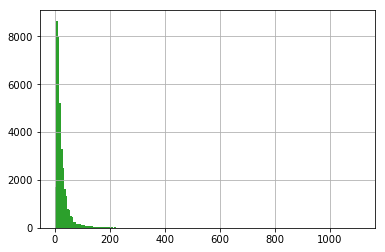

In [31]:
import matplotlib.pyplot as plt
df.price.hist(bins=200)
plt.show()

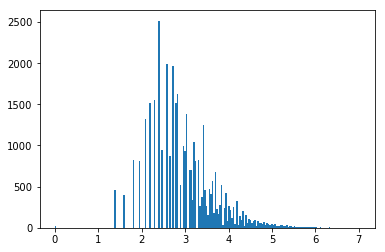

In [32]:
plt.hist(np.log(df.price+1), bins = 200)
plt.show()

In [78]:
y = np.log(df.price+1)

In [79]:
y.shape

(37066,)

Now we have standardized and scaled data sets ready and we can re-try training our models:

In [80]:
# Starting with X_minmax (scaled features)
np.random.seed(seed)
model = Sequential()
model.add(Dense(X_minmax.shape[1], input_dim = X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_13 = model.fit(X_minmax,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_13 = np.sqrt(min(model_13.history["val_loss"]))
RMSE_model_13

Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 38us/step - loss: 4.2032 - val_loss: 1.2055
Epoch 2/100
25946/25946 [==============================] - 1s 27us/step - loss: 0.9293 - val_loss: 0.6881
Epoch 3/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.6206 - val_loss: 0.5300
Epoch 4/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.5228 - val_loss: 0.4773
Epoch 5/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4916 - val_loss: 0.4609
Epoch 6/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4812 - val_loss: 0.4550
Epoch 7/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4764 - val_loss: 0.4514
Epoch 8/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4746 - val_loss: 0.4505
Epoch 9/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4737 - val_loss: 0.4

25946/25946 [==============================] - 0s 18us/step - loss: 0.4608 - val_loss: 0.4471
Epoch 78/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4609 - val_loss: 0.4470
Epoch 79/100
25946/25946 [==============================] - 0s 17us/step - loss: 0.4610 - val_loss: 0.4466
Epoch 80/100
25946/25946 [==============================] - 0s 17us/step - loss: 0.4607 - val_loss: 0.4482
Epoch 81/100
25946/25946 [==============================] - 0s 17us/step - loss: 0.4608 - val_loss: 0.4472
Epoch 82/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.4606 - val_loss: 0.4467
Epoch 83/100
25946/25946 [==============================] - 0s 17us/step - loss: 0.4607 - val_loss: 0.4503
Epoch 84/100
25946/25946 [==============================] - 0s 17us/step - loss: 0.4608 - val_loss: 0.4465
Epoch 85/100
25946/25946 [==============================] - 0s 17us/step - loss: 0.4608 - val_loss: 0.4464
Epoch 86/100
25946/25946 [========================

0.66694540986076201

This was promising! Minmax scaling seems to help for the model.

In [81]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(X_stdscale.shape[1], input_dim = X_stdscale.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_14 = model.fit(X_stdscale,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_14 = np.sqrt(min(model_14.history["val_loss"]))
RMSE_model_14

Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 31us/step - loss: 3.9986 - val_loss: 1.0113
Epoch 2/100
25946/25946 [==============================] - 1s 19us/step - loss: 0.8118 - val_loss: 0.6163
Epoch 3/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.5915 - val_loss: 0.5279
Epoch 4/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.5431 - val_loss: 0.5095
Epoch 5/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.5262 - val_loss: 0.5001
Epoch 6/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.5154 - val_loss: 0.4930
Epoch 7/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.5084 - val_loss: 0.4876
Epoch 8/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.5021 - val_loss: 0.4829
Epoch 9/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4964 - val_loss: 0.4

25946/25946 [==============================] - 1s 22us/step - loss: 0.4555 - val_loss: 0.4539
Epoch 78/100
25946/25946 [==============================] - 1s 20us/step - loss: 0.4557 - val_loss: 0.4520
Epoch 79/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4556 - val_loss: 0.4539
Epoch 80/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4554 - val_loss: 0.4533
Epoch 81/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4556 - val_loss: 0.4541
Epoch 82/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4551 - val_loss: 0.4520
Epoch 83/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4556 - val_loss: 0.4545
Epoch 84/100
25946/25946 [==============================] - 0s 18us/step - loss: 0.4554 - val_loss: 0.4538
Epoch 85/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4555 - val_loss: 0.4526
Epoch 86/100
25946/25946 [========================

0.6722402842940296

In [82]:
# Continue with X_minmax (scaled features), slighly increasing model complexity
np.random.seed(seed)
model = Sequential()
model.add(Dense(X_minmax.shape[1], input_dim = X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_15 = model.fit(X_minmax,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_15 = np.sqrt(min(model_15.history["val_loss"]))
RMSE_model_15

Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 42us/step - loss: 3.0712 - val_loss: 0.5992
Epoch 2/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.5269 - val_loss: 0.4636
Epoch 3/100
25946/25946 [==============================] - 1s 20us/step - loss: 0.4811 - val_loss: 0.4525
Epoch 4/100
25946/25946 [==============================] - 1s 20us/step - loss: 0.4736 - val_loss: 0.4504
Epoch 5/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4717 - val_loss: 0.4485
Epoch 6/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4704 - val_loss: 0.4486
Epoch 7/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4695 - val_loss: 0.4480
Epoch 8/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4693 - val_loss: 0.4472
Epoch 9/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4683 - val_loss: 0.4

25946/25946 [==============================] - 1s 26us/step - loss: 0.4599 - val_loss: 0.4448
Epoch 78/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4595 - val_loss: 0.4454
Epoch 79/100
25946/25946 [==============================] - 1s 20us/step - loss: 0.4597 - val_loss: 0.4443
Epoch 80/100
25946/25946 [==============================] - 1s 21us/step - loss: 0.4591 - val_loss: 0.4455
Epoch 81/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4596 - val_loss: 0.4454
Epoch 82/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.4587 - val_loss: 0.4446
Epoch 83/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4591 - val_loss: 0.4494
Epoch 84/100
25946/25946 [==============================] - 1s 29us/step - loss: 0.4590 - val_loss: 0.4451
Epoch 85/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4591 - val_loss: 0.4445
Epoch 86/100
25946/25946 [========================

0.66633644156462402

It's getting better! Continue increasing model complexity.

In [83]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(X_minmax.shape[1]*2, input_dim = X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(X_minmax.shape[1]*2, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_16 = model.fit(X_minmax,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_16 = np.sqrt(min(model_16.history["val_loss"]))
RMSE_model_16

Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 43us/step - loss: 2.3449 - val_loss: 0.4819
Epoch 2/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4852 - val_loss: 0.4507
Epoch 3/100
25946/25946 [==============================] - 1s 21us/step - loss: 0.4734 - val_loss: 0.4493
Epoch 4/100
25946/25946 [==============================] - 1s 21us/step - loss: 0.4706 - val_loss: 0.4488
Epoch 5/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4693 - val_loss: 0.4465
Epoch 6/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4685 - val_loss: 0.4479
Epoch 7/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4679 - val_loss: 0.4522
Epoch 8/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4696 - val_loss: 0.4472
Epoch 9/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4684 - val_loss: 0.4

25946/25946 [==============================] - 1s 29us/step - loss: 0.4590 - val_loss: 0.4467
Epoch 78/100
25946/25946 [==============================] - 1s 34us/step - loss: 0.4581 - val_loss: 0.4469
Epoch 79/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4585 - val_loss: 0.4459
Epoch 80/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4572 - val_loss: 0.4468
Epoch 81/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.4577 - val_loss: 0.4467
Epoch 82/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.4567 - val_loss: 0.4480
Epoch 83/100
25946/25946 [==============================] - 1s 28us/step - loss: 0.4571 - val_loss: 0.4497
Epoch 84/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4567 - val_loss: 0.4457
Epoch 85/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4570 - val_loss: 0.4463
Epoch 86/100
25946/25946 [========================

0.6665976297688434

Looks like we hit the model capacity again. Let's try another layer.

In [84]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(X_minmax.shape[1], input_dim = X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_17 = model.fit(X_minmax,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_17 = np.sqrt(min(model_17.history["val_loss"]))
RMSE_model_17

Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 1s 41us/step - loss: 2.5496 - val_loss: 0.4932
Epoch 2/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4890 - val_loss: 0.4526
Epoch 3/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4753 - val_loss: 0.4499
Epoch 4/100
25946/25946 [==============================] - 1s 24us/step - loss: 0.4718 - val_loss: 0.4510
Epoch 5/100
25946/25946 [==============================] - 1s 30us/step - loss: 0.4706 - val_loss: 0.4479
Epoch 6/100
25946/25946 [==============================] - 1s 27us/step - loss: 0.4698 - val_loss: 0.4511
Epoch 7/100
25946/25946 [==============================] - 1s 23us/step - loss: 0.4697 - val_loss: 0.4574
Epoch 8/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4723 - val_loss: 0.4477
Epoch 9/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4706 - val_loss: 0.4

25946/25946 [==============================] - 1s 23us/step - loss: 0.4629 - val_loss: 0.4475
Epoch 78/100
25946/25946 [==============================] - 1s 25us/step - loss: 0.4628 - val_loss: 0.4500
Epoch 79/100
25946/25946 [==============================] - 1s 27us/step - loss: 0.4632 - val_loss: 0.4474
Epoch 80/100
25946/25946 [==============================] - 1s 32us/step - loss: 0.4622 - val_loss: 0.4476
Epoch 81/100
25946/25946 [==============================] - 1s 26us/step - loss: 0.4626 - val_loss: 0.4468
Epoch 82/100
25946/25946 [==============================] - 1s 29us/step - loss: 0.4618 - val_loss: 0.4477
Epoch 83/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4624 - val_loss: 0.4489
Epoch 84/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4614 - val_loss: 0.4462
Epoch 85/100
25946/25946 [==============================] - 1s 22us/step - loss: 0.4624 - val_loss: 0.4502
Epoch 86/100
25946/25946 [========================

0.66741381955167611

In [85]:
np.random.seed(seed)
model = Sequential()
model.add(Dense(100, input_dim = X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(100, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(100, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_18 = model.fit(X_minmax,y,batch_size=100,epochs = 100,validation_split= 0.3)
RMSE_model_18 = np.sqrt(min(model_18.history["val_loss"]))
RMSE_model_18

Train on 25946 samples, validate on 11120 samples
Epoch 1/100
25946/25946 [==============================] - 2s 71us/step - loss: 1.3357 - val_loss: 0.4499
Epoch 2/100
25946/25946 [==============================] - 1s 38us/step - loss: 0.4709 - val_loss: 0.4489
Epoch 3/100
25946/25946 [==============================] - 1s 36us/step - loss: 0.4696 - val_loss: 0.4492
Epoch 4/100
25946/25946 [==============================] - 1s 39us/step - loss: 0.4716 - val_loss: 0.4545
Epoch 5/100
25946/25946 [==============================] - 1s 38us/step - loss: 0.4681 - val_loss: 0.4481
Epoch 6/100
25946/25946 [==============================] - 1s 42us/step - loss: 0.4665 - val_loss: 0.4571
Epoch 7/100
25946/25946 [==============================] - 1s 36us/step - loss: 0.4684 - val_loss: 0.4472
Epoch 8/100
25946/25946 [==============================] - 1s 38us/step - loss: 0.4676 - val_loss: 0.4465
Epoch 9/100
25946/25946 [==============================] - 1s 44us/step - loss: 0.4702 - val_loss: 0.4

Epoch 77/100
25946/25946 [==============================] - 1s 44us/step - loss: 0.4440 - val_loss: 0.4499
Epoch 78/100
25946/25946 [==============================] - 1s 41us/step - loss: 0.4429 - val_loss: 0.4549
Epoch 79/100
25946/25946 [==============================] - 1s 42us/step - loss: 0.4441 - val_loss: 0.4535
Epoch 80/100
25946/25946 [==============================] - 1s 36us/step - loss: 0.4420 - val_loss: 0.4642
Epoch 81/100
25946/25946 [==============================] - 1s 40us/step - loss: 0.4423 - val_loss: 0.4532
Epoch 82/100
25946/25946 [==============================] - 1s 45us/step - loss: 0.4420 - val_loss: 0.4545
Epoch 83/100
25946/25946 [==============================] - 1s 34us/step - loss: 0.4416 - val_loss: 0.4517
Epoch 84/100
25946/25946 [==============================] - 1s 35us/step - loss: 0.4412 - val_loss: 0.4532
Epoch 85/100
25946/25946 [==============================] - 1s 41us/step - loss: 0.4408 - val_loss: 0.4520
Epoch 86/100
25946/25946 [===========

0.66687018587000157

In [86]:
# Removing the batch and only performing 10 epochs
np.random.seed(seed)
model = Sequential()
model.add(Dense(X_minmax.shape[1]*2, input_dim = X_minmax.shape[1], kernel_initializer= "normal", activation= "relu"))
model.add(Dense(X_minmax.shape[1]*2, kernel_initializer= "normal", activation= "relu"))
model.add(Dense(1, kernel_initializer= "normal"))
model.compile(optimizer= "adam", loss= "mean_squared_error")
model_19 = model.fit(X_minmax,y,epochs = 10,validation_split= 0.3)
RMSE_model_19 = np.sqrt(min(model_19.history["val_loss"]))
RMSE_model_19

Train on 25946 samples, validate on 11120 samples
Epoch 1/10
25946/25946 [==============================] - 2s 84us/step - loss: 1.0771 - val_loss: 0.4512
Epoch 2/10
25946/25946 [==============================] - 2s 61us/step - loss: 0.4770 - val_loss: 0.4632
Epoch 3/10
25946/25946 [==============================] - 2s 69us/step - loss: 0.4751 - val_loss: 0.4510
Epoch 4/10
25946/25946 [==============================] - 2s 60us/step - loss: 0.4734 - val_loss: 0.4515
Epoch 5/10
25946/25946 [==============================] - 2s 76us/step - loss: 0.4726 - val_loss: 0.4470
Epoch 6/10
25946/25946 [==============================] - 2s 61us/step - loss: 0.4711 - val_loss: 0.4505
Epoch 7/10
25946/25946 [==============================] - 2s 69us/step - loss: 0.4704 - val_loss: 0.4613
Epoch 8/10
25946/25946 [==============================] - 2s 61us/step - loss: 0.4699 - val_loss: 0.4468
Epoch 9/10
25946/25946 [==============================] - 2s 61us/step - loss: 0.4692 - val_loss: 0.4544
Epoch

0.66841383692321843

### Take home message

For this data set, minmax scaling of the data helped only a little bit for training a better model. We will save this version of the predictors to continue model tuning as we learn different approaches.

In [87]:
pd.DataFrame(X_minmax).to_csv("mini_subtrain_X_minmax.csv")

In [88]:
pd.DataFrame(y).to_csv("mini_subtrain_y.csv")